# Breast cancer detection from thermal imaging

The main purpose of this project is to develop a comprehensive decision support system for breast cancer screening.

## Library import
En esta sección se tratará de importar las librerias que se van a utilizar a lo largo de este modelo. Hay que tener en cuenta que parte de las librerías que utiliza este programa se encuentran declaradas en los ficheros que se encuentran en `src/scripts/*.py`.

In [31]:
%reload_ext autoreload
%autoreload 2

In [32]:
from scripts import *

In [33]:
computer.check_available_devices() # Check available devices

Available devices:
- CPU: /physical_device:CPU:0
- GPU: /physical_device:GPU:0


## Data selection
To make this model work correctly it will be necessary to extract and save the images found in the `data` folder.

In this folder there are two labeled folders that contain all the images to be used:
```
data
├── healthy
└── sick
```

In [34]:
data = Data("./data/") # Data imported into a table

data.images.head(3) # Display first 3 rows

image category
0  ./data/healthy/16-TFRON_V16_31-10-2012_8.jpg        0
1  ./data/healthy/169-TFRON_V173_8-4-2013_0.jpg        0
2  ./data/healthy/17-TFRON_V17_31-10-2012_6.jpg        0

## Transformation
In the transformation stage, the data is adapted to find the solution to the problem to be solved.

First of all, the data obtained previously will be divided to be able to use it for training and to check the results.

In [35]:
data.training, data.test = data.train_test_split(test_size=0.15, shuffle=True, stratify=True) # Split data into train and test

In [36]:
# The category distribution is shown for the original, training, and test data
data.count_labels(data.images, "Original")
data.count_labels(data.training, "Training")
data.count_labels(data.test, "Test")

Original: [99 96] [0.51 0.49]
Training: [84 81] [0.51 0.49]
Test: [15 15] [0.5 0.5]


Once the data is divided, different transformation techniques are applied on it to expand the size of the dataset in real time while training the model.

In [37]:
train_generator, validation_generator, test_generator = data.image_generator() # Image genearation

Found 132 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.
Found 30 validated image filenames belonging to 2 classes.


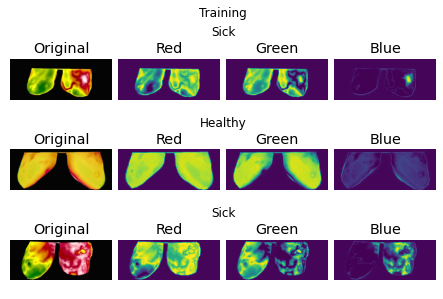

In [128]:
filters = {
	"original": lambda x: x,
	"red": lambda x: x[:, :, 0],
	"green": lambda x: x[:, :, 1],
	"blue": lambda x: x[:, :, 2]
}

data.show_images(train_generator, filters, "Training") # Show some images from the training generator

## Data Mining
This section seeks to apply techniques that are capable of extracting useful patterns and then evaluate them.

### Model creation
The model to be used for the next training is created.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 213, 536, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 106, 268, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 266, 32)      9248      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

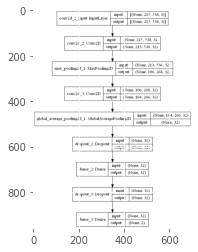

In [40]:
model = Model("model", summary=True, plot=True) # Model creation

In [41]:
model.compile() # Compile the model

### Model training
The created model is trained indicating the times that are going to be used.

Epoch 1/300
6/6 [==============================] - 3s 326ms/step - loss: 0.7008 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.3939

Epoch 00001: val_accuracy improved from -inf to 0.39394, saving model to ./output\model_weigth.hdf5
Epoch 2/300
6/6 [==============================] - 2s 267ms/step - loss: 0.6934 - accuracy: 0.4697 - val_loss: 0.6938 - val_accuracy: 0.3939

Epoch 00002: val_accuracy did not improve from 0.39394
Epoch 3/300
6/6 [==============================] - 2s 306ms/step - loss: 0.6935 - accuracy: 0.4621 - val_loss: 0.6924 - val_accuracy: 0.6061

Epoch 00003: val_accuracy improved from 0.39394 to 0.60606, saving model to ./output\model_weigth.hdf5
Epoch 4/300
6/6 [==============================] - 2s 272ms/step - loss: 0.6933 - accuracy: 0.4621 - val_loss: 0.6920 - val_accuracy: 0.6061

Epoch 00004: val_accuracy did not improve from 0.60606
Epoch 5/300
6/6 [==============================] - 2s 267ms/step - loss: 0.6951 - accuracy: 0.4091 - val_loss: 0.6913 -

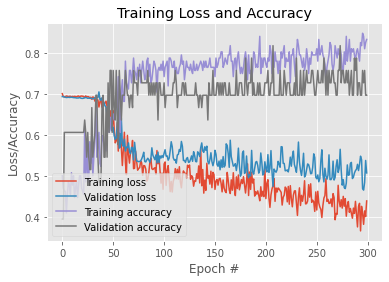

In [42]:
model.fit(train_generator, validation_generator, epochs=300, plot=True) # Train the model

### Model evaluation
The trained model is evaluated using the generators created before. In this case, the best weight matrix obtained in the training will be used.

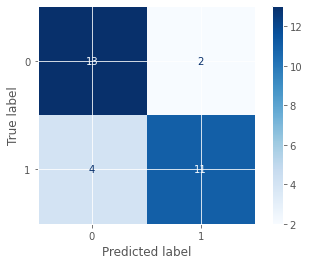

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

Accuracy: 0.8
Specificity: 0.8667
Sensitivity: 0.7333
Precision: 0.8462


In [43]:
model.evaluate(test_generator, best_model=True) # Evaluate the model

### Grad-CAM
An activation map of the predictions obtained by the convolutional network is displayed.

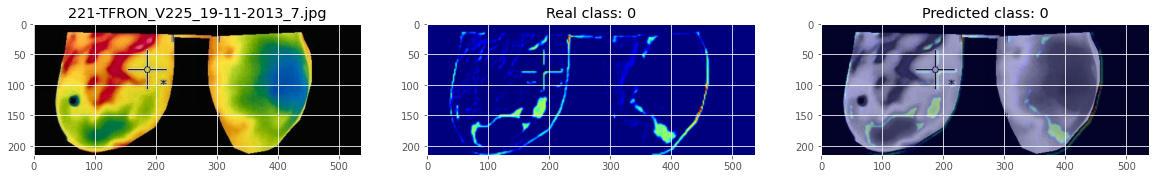

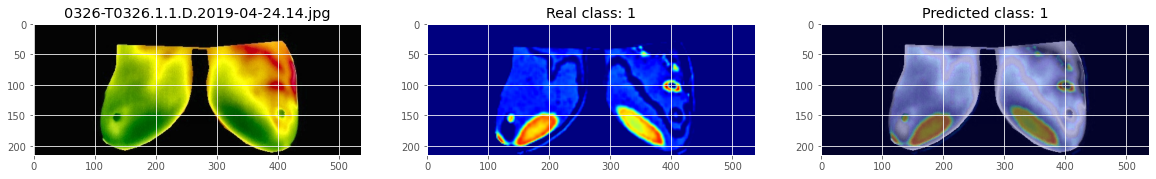

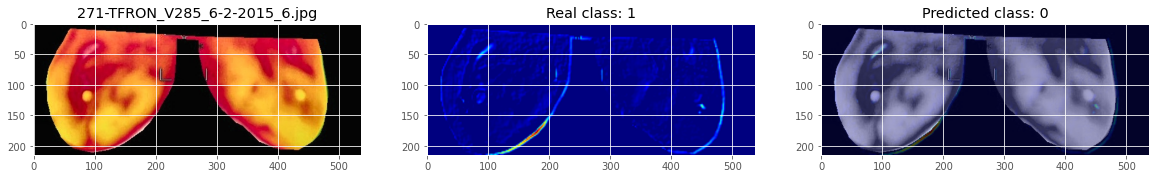

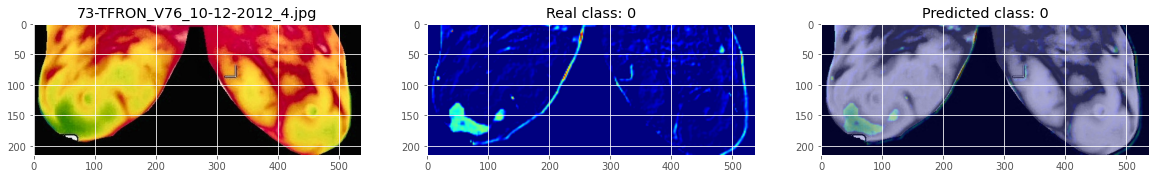

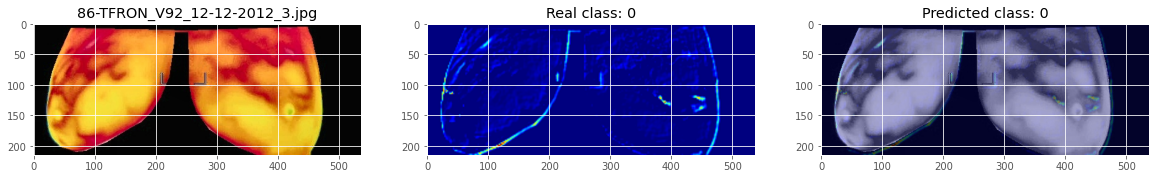

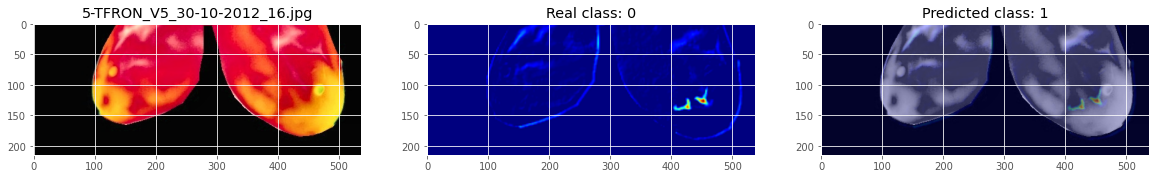

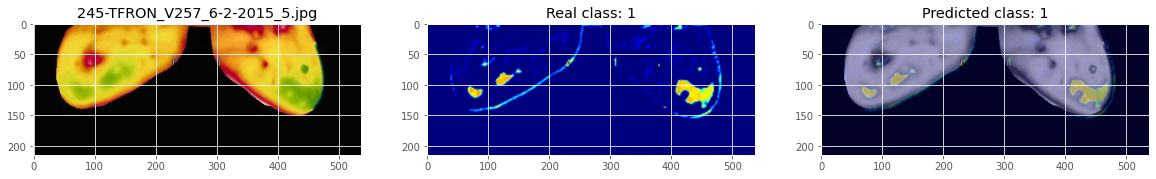

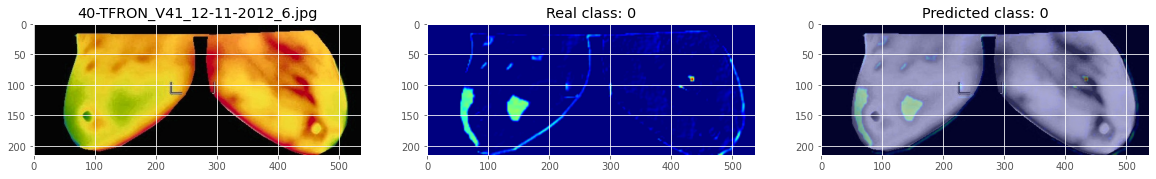

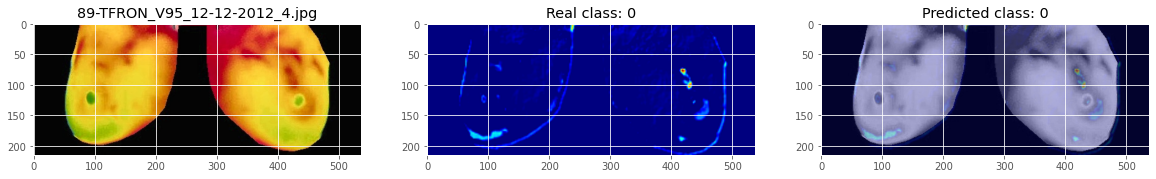

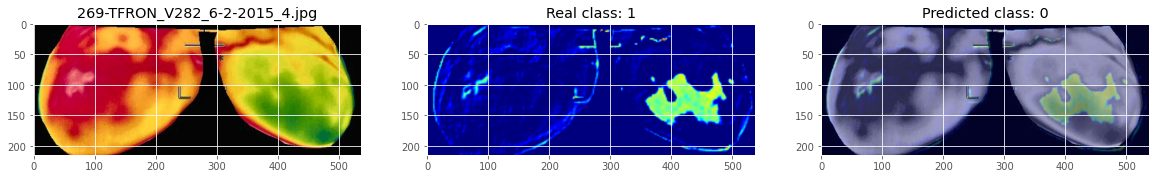

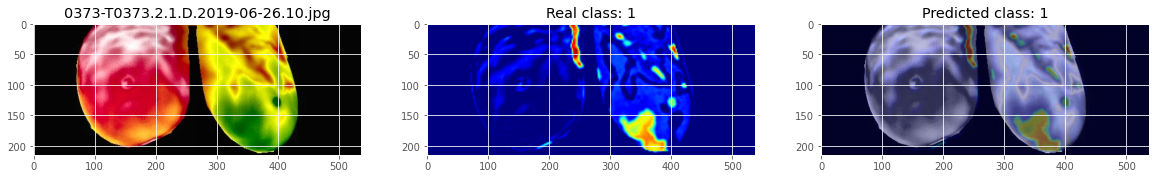

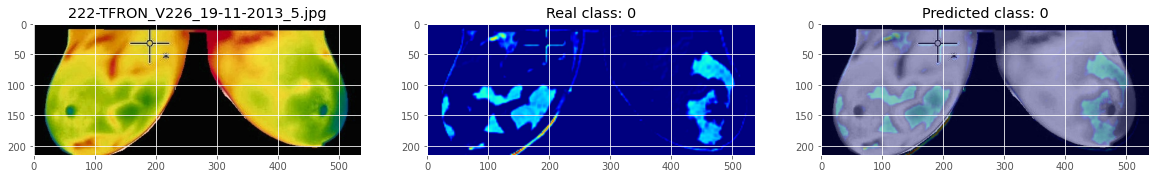

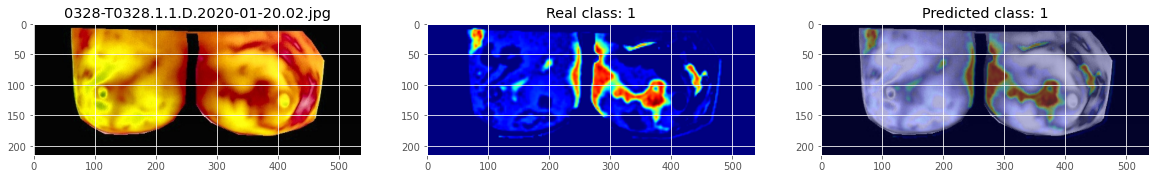

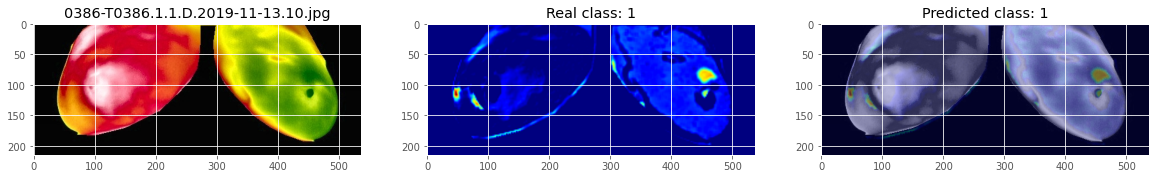

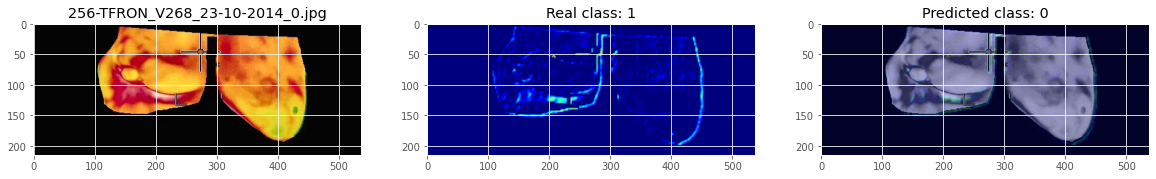

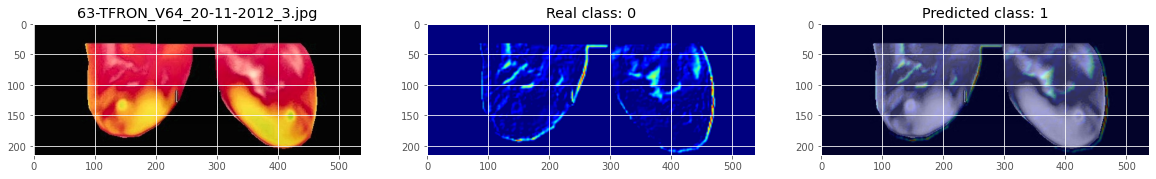

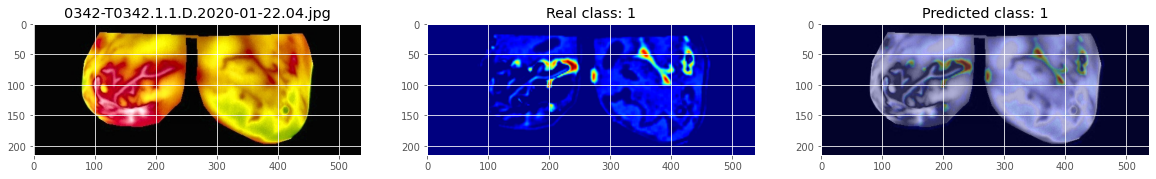

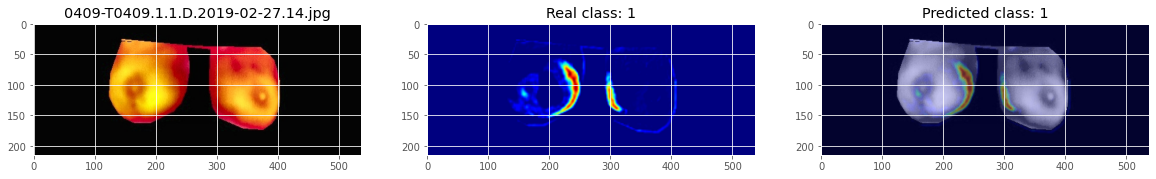

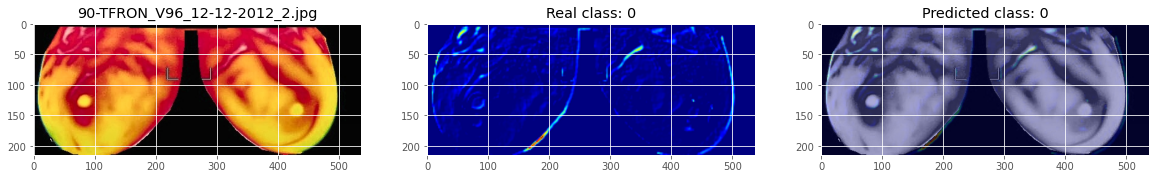

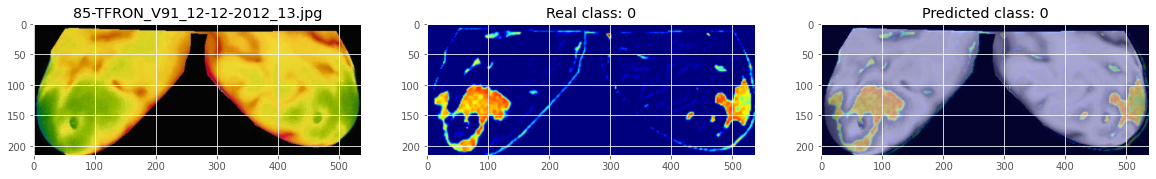

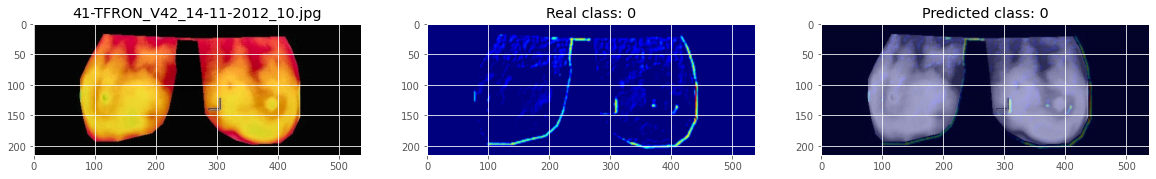

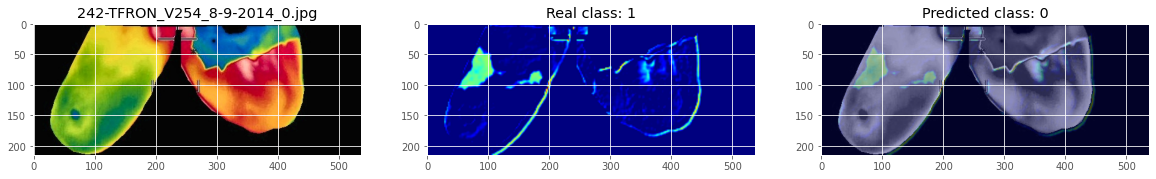

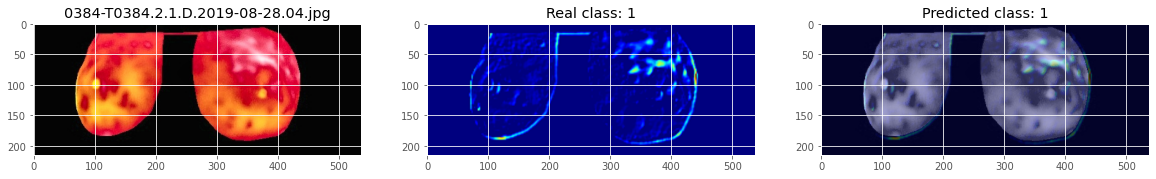

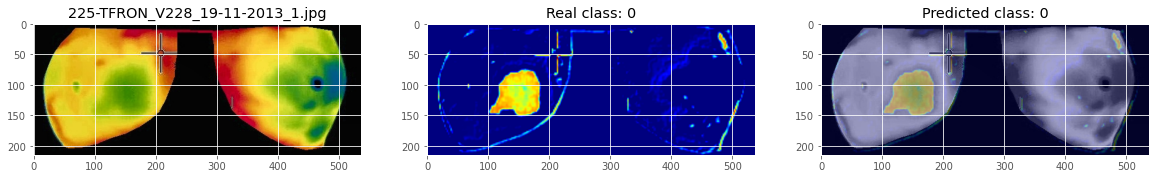

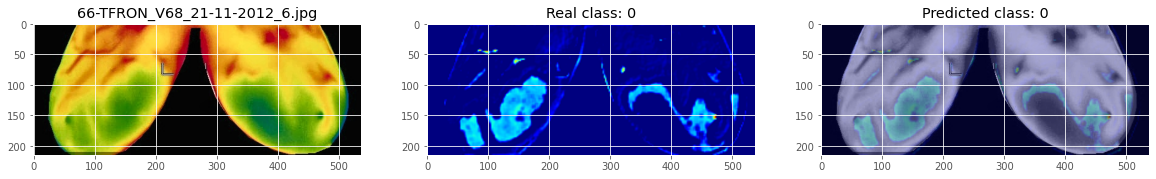

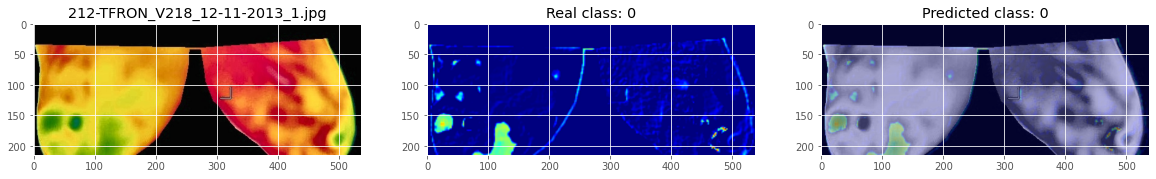

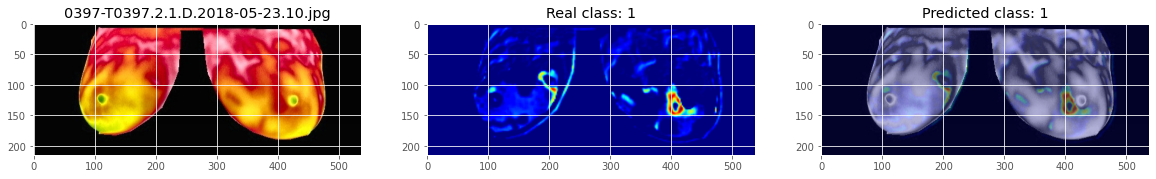

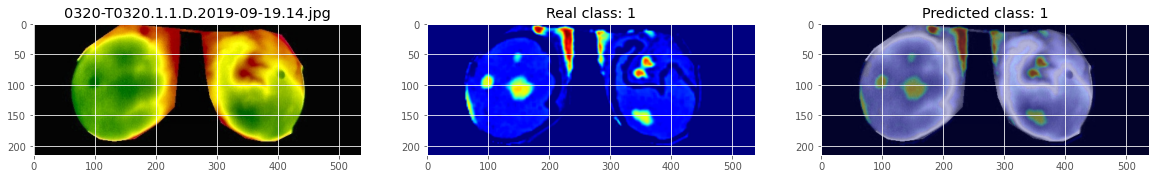

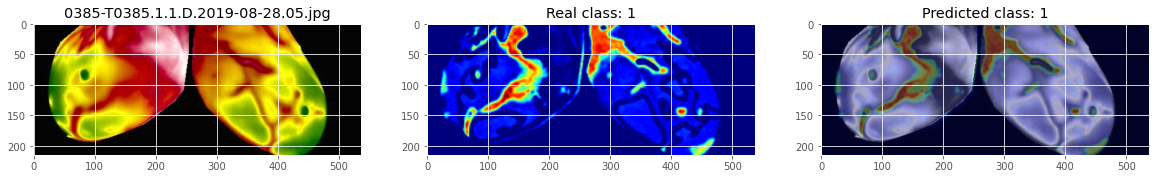

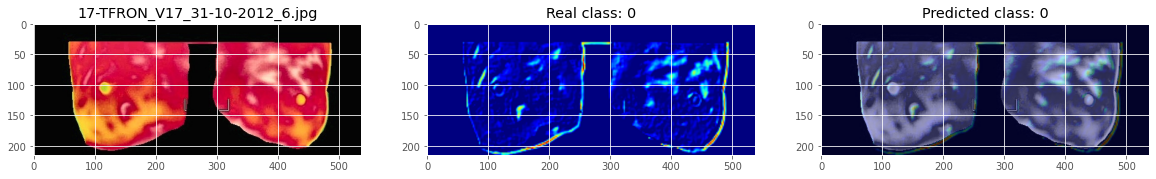

In [44]:
# The activation map is displayed
for index, image in data.test.iterrows():
	model.visualize_heatmap(image)